#Refernce
Codes taken from the following links:
https://raghakot.github.io/keras-vis/visualizations/saliency/
https://github.com/christianversloot/machine-learning-articles/blob/main/visualizing-keras-cnn-attention-saliency-maps.md

In [ ]:
!pip install deeplift


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for deeplift: filename=deeplift-0.6.13.0-py3-none-any.whl size=36450 sha256=dcb9cdbe08e57be1f0615555b26973d9c422b72d670081e8fc395ab5a243506e
  Stored in directory: /root/.cache/pip/wheels/80/42/80/d6af8dbe1e394d4696459ed54b21787722b9bcb9e240dd81f5
Successfully built deeplift


In [ ]:
!git clone https://github.com/kundajelab/deeplift.git #will clone the deeplift repository
!pip install --editable deeplift/ #install deeplift from the cloned repository. The "editable" flag means changes to the code will be picked up automatically.


Cloning into 'deeplift'...
remote: Enumerating objects: 4596, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 4596 (delta 59), reused 29 (delta 12), pack-reused 4484
Receiving objects: 100% (4596/4596), 10.38 MiB | 20.36 MiB/s, done.
Resolving deltas: 100% (2471/2471), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/deeplift
  Attempting uninstall: deeplift
    Found existing installation: deeplift 0.6.13.0
    Uninstalling deeplift-0.6.13.0:
      Successfully uninstalled deeplift-0.6.13.0
  Running setup.py develop for deeplift


In [ ]:
import keras
import tensorflow as tf
import vis ## keras-vis
import matplotlib.pyplot as plt
import numpy as np
print("keras      {}".format(keras.__version__))
print("tensorflow {}".format(tf.__version__))



keras      2.9.0
tensorflow 2.9.2


In [ ]:

model = keras.models.load_model('/content/drive/MyDrive/Project/model.pth')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
!pip install keras-vis

!pip install tensorflow

!pip install tf-keras-vis tensorflow

#from google.colab import drive
#drive.mount('/content/drive')

# Commented out IPython magic to ensure Python compatibility.
# %reload_ext autoreload
# %autoreload 2

import tensorflow as tf

from tensorflow.keras.applications.vgg16 import VGG16 as Model
from tensorflow.keras.applications.vgg16 import preprocess_input

import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from vis.utils import utils
from tensorflow.keras.applications.vgg16 import decode_predictions
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from vis.utils import utils
from keras import activations
import matplotlib.image as mpimg
import scipy.ndimage as ndimage

In [ ]:
from vis.losses import ActivationMaximization
from vis.regularizers import TotalVariation, LPNorm


In [ ]:
import numpy as np

In [ ]:
import os
import cv2
path ='/content/drive/MyDrive/Project/dataset-png/'
dataset_path = os.listdir(path)

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)

In [ ]:
images = np.array(images)

images = images.astype('float32') / 255.0
images[0].shape

(224, 224, 3)

In [ ]:
print(images.shape)

(1179, 224, 224, 3)


In [ ]:
print(images.shape)

(1179, 224, 224, 3)


In [ ]:
from tf_keras_vis.utils.scores import CategoricalScore
#cat - 281, dog -235 , hen -8, tiger - 292
score = [CategoricalScore([1])]
print(score)

In [ ]:
subprot_args = {
   'nrows': 1,
   'ncols': 4,
   'figsize': (6, 3),
   'subplot_kw': {'xticks': [], 'yticks': []}
}


<module 'tensorflow.keras.preprocessing.image' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/preprocessing/image/__init__.py'>


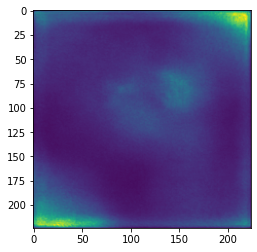

In [ ]:
img=mpimg.imread('/content/drive/MyDrive/Project/dataset-png/non-pd/PPMI_100004_NM_Reconstructed_DaTSCAN_Br_20210628213737733_1_S1038351_I1461542.png')
plt.imshow(img)
print(image)
#plt.savefig('OrigScale.png', dpi=300)

# identify layer to calculate gradient
layer_idx = utils.find_layer_idx(model, 'dense_3')
# switch activation to linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# compute gradient
saliency = Saliency(model, clone=False)

# Generate saliency map
saliency_map = saliency(score, images[650],smooth_samples=600)
saliency_map = normalize(saliency_map)

plt.imshow(saliency_map[0])
plt.savefig('SalMapRaw.png', dpi=300)

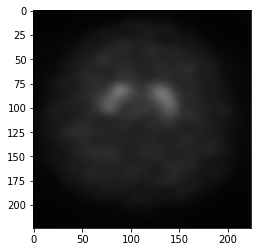

In [ ]:
plt.imshow(images[650])

In [ ]:
layer_idx = utils.find_layer_idx(model, 'dense_2')
# switch activation to linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# compute gradient



In [ ]:
from tf_keras_vis.utils.scores import CategoricalScore
score = CategoricalScore([0])